In [1]:
import pandas as pd

In [3]:
# Load the dataset
file_path = "/Users/mac/6 semester Courses/Data Visualization/Project/combined_dataset.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df_info = df.info()
df_head = df.head()
df_description = df.describe(include='all')

df.shape, df.columns, df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

((1197, 15),
 Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
        'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
        'no_of_style_change', 'no_of_workers', 'actual_productivity'],
       dtype='object'),
 date                      object
 quarter                   object
 department                object
 day                       object
 team                       int64
 targeted_productivity    float64
 smv                      float64
 wip                      float64
 over_time                  int64
 incentive                  int64
 idle_time                float64
 idle_men                   int64
 no_of_style_change         int64
 no_of_workers            float64
 actual_productivity      float64
 dtype: object)

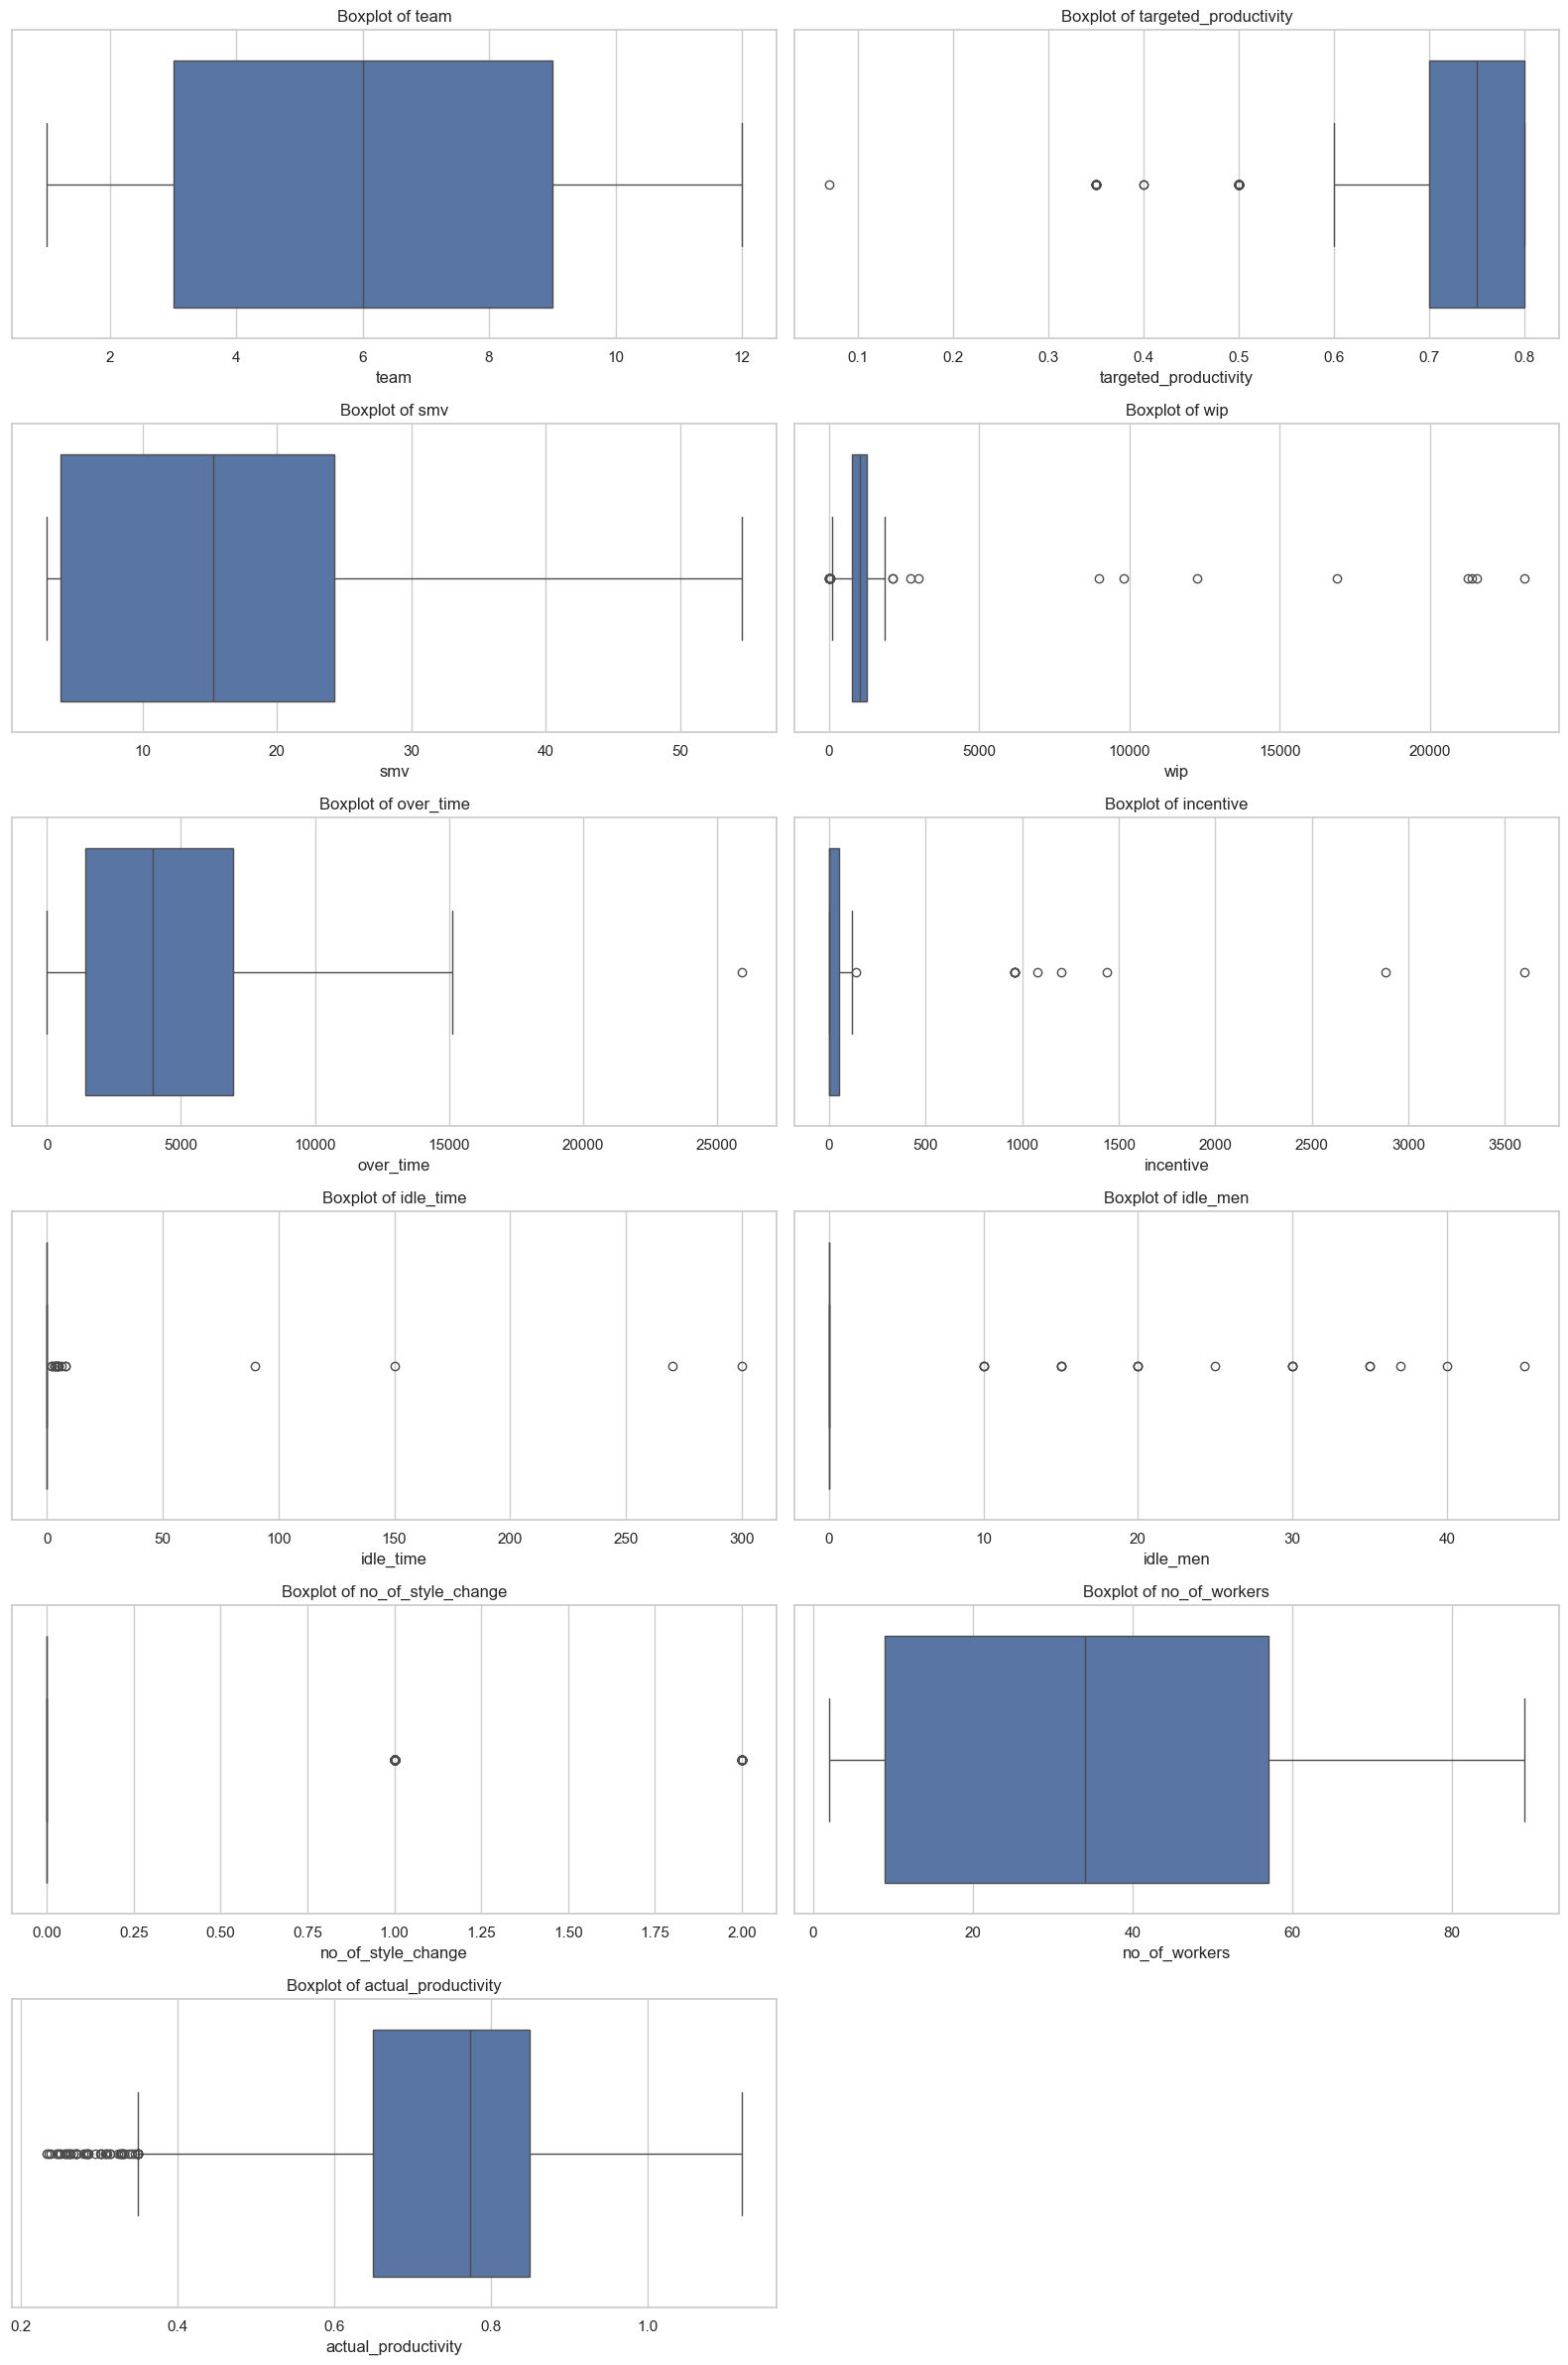

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate required rows and columns
num_plots = len(numerical_cols)
ncols = 2
nrows = (num_plots + ncols - 1) // ncols  # ensures all columns fit

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


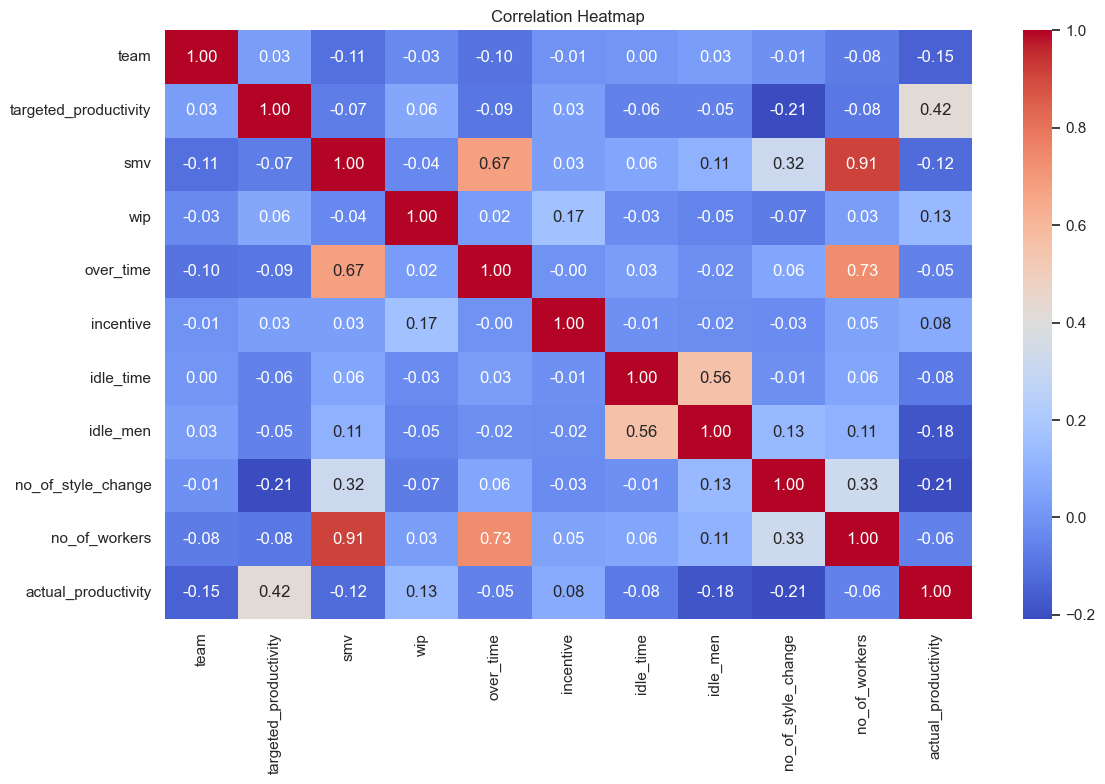

In [11]:
# Recalculate correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
